In [2]:
import pystan

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


In [4]:
print(fit)

Inference for Stan model: anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          8.0     0.2   4.71   -0.8   4.85   7.85  10.89  18.48    559    1.0
tau        6.46    0.24   5.49   0.24   2.58   5.32   8.74  20.09    539   1.01
eta[0]     0.39    0.02   0.94  -1.47  -0.25    0.4   1.03   2.14   1685    1.0
eta[1]    -0.01    0.02   0.87  -1.79  -0.59 4.8e-3   0.58   1.64   1757    1.0
eta[2]    -0.21    0.02   0.94  -2.05  -0.86  -0.21   0.42   1.64   2000    1.0
eta[3]    -0.02    0.02    0.9  -1.76  -0.62  -0.02   0.57   1.81   2000    1.0
eta[4]    -0.36    0.02   0.86  -1.97  -0.94  -0.39   0.17   1.45   1516    1.0
eta[5]    -0.23    0.02   0.85  -1.92  -0.79  -0.24   0.32    1.5   2000    1.0
eta[6]     0.35    0.02   0.84  -1.29  -0.23   0.35   0.91   1.96   2000    1.0
eta[7]     0.

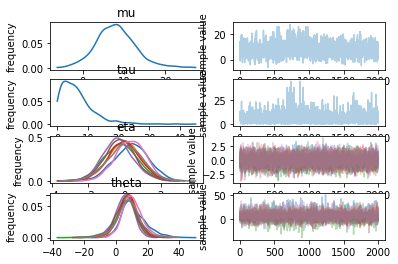

In [8]:
fit.plot()